In [ ]:
import os
import numpy as np  
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, Flatten ,Dropout, GlobalAveragePooling2D, ReLU
import tensorflow as tf
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import DenseNet201
from keras.models import Model

# Load the CIFAR dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

labels_list = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer'\
               , 'dog', 'frog' , 'horse' , 'ship' , 'truck']

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,\
                                                    test_size=0.01, random_state=42)               

x_val = tf.image.resize(x_val/255, (224, 224), method=tf.image.ResizeMethod.BILINEAR)
# Create the data generator
data_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True
preprocessing_function = lambda x: x.astype('float32')) 

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
# Create the data iterator
train_iter = data_gen.flow(
    x_train,
    y_train,
    batch_size=64,
    shuffle=True
)

val_iter = data_gen.flow(
    x_val,
    y_val,
    batch_size=64,
    shuffle=True
)
resizing = tf.keras.layers.Resizing(224,224,interpolation = 'bilinear')

def resize_generator(data_iter):
    for images, labels in data_iter:
        resized_images = tf.image.resize(images, (224, 224), method=tf.image.ResizeMethod.BILINEAR)
        # resized_images = resizing (images)
        yield resized_images, labels


gen_train = resize_generator(train_iter)
gen_val = resize_generator(val_iter)

resized_images, labels = next(gen_train)
resized_images_2, labels_2 = next(gen_train)

170498071/170498071 [==============================] - 13s 0us/step


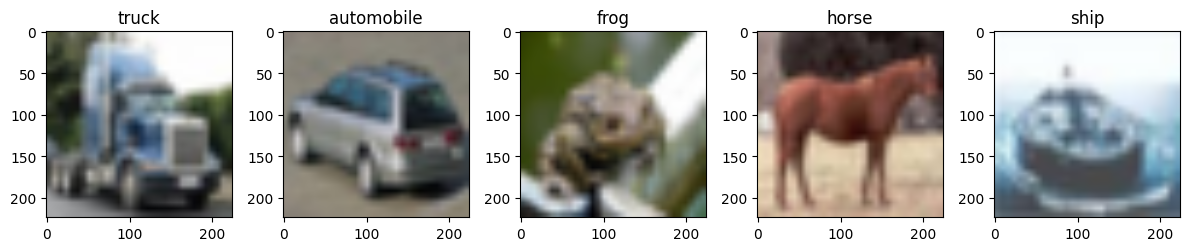

In [ ]:
from keras.utils import to_categorical

plt.subplots(1, 5, figsize=(12, 8))

plt.subplot(1,5,1)
plt.imshow(resized_images[12])
plt.title(labels_list[labels[12].argmax(axis = 0)])
plt.subplot(1,5,2)
plt.imshow(resized_images[24])
plt.title(labels_list[labels[24].argmax(axis = 0)]) 
plt.subplot(1,5,3)
plt.imshow(resized_images[48])
plt.title(labels_list[labels[48].argmax(axis = 0)])
plt.subplot(1,5,4)
plt.imshow(resized_images[54])
plt.title(labels_list[labels[54].argmax(axis = 0)])
plt.subplot(1,5,5)
plt.imshow(resized_images[62])
plt.title(labels_list[labels[62].argmax(axis = 0)])
plt.tight_layout()
plt.show()

In [ ]:
from keras.applications import DenseNet201
from keras.models import Model
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, ReLU, Flatten
from tensorflow import keras

input_shape = (224, 224, 3)

model = DenseNet201(weights='imagenet' , include_top = False, input_shape=input_shape)

for layer in model.layers:
  layer.trainable = False

model.get_layer('conv5_block1_0_bn').trainable = True

x = model.output
x = Flatten()(x)
x = Dense(256)(x)
x = ReLU()(x)
x = Dropout(0.005)(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs = model.input, outputs = predictions)

model.compile(loss='categorical_crossentropy', optimizer='adam',\
              metrics=['accuracy'])
model.summary()

74836368/74836368 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                             

In [ ]:
import gc
gc.collect()

27655

In [ ]:
history_CNN = model.fit(gen_train,steps_per_epoch=len(x_train) // 64, validation_data = (x_val,y_val) ,epochs=20) #validation_data = val_gen (x_val,y_val)

Epoch 1/20
773/773 [==============================] - 313s 371ms/step - loss: 0.7859 - accuracy: 0.8084 - val_loss: 0.5003 - val_accuracy: 0.8420
Epoch 2/20
773/773 [==============================] - 271s 350ms/step - loss: 0.2943 - accuracy: 0.8990 - val_loss: 0.4379 - val_accuracy: 0.8540
Epoch 3/20
773/773 [==============================] - 271s 350ms/step - loss: 0.1976 - accuracy: 0.9302 - val_loss: 0.5422 - val_accuracy: 0.8520
Epoch 4/20
773/773 [==============================] - 264s 342ms/step - loss: 0.1438 - accuracy: 0.9504 - val_loss: 0.6171 - val_accuracy: 0.8460
Epoch 5/20
773/773 [==============================] - 265s 342ms/step - loss: 0.1239 - accuracy: 0.9570 - val_loss: 0.6793 - val_accuracy: 0.8460
Epoch 6/20
773/773 [==============================] - 264s 342ms/step - loss: 0.1017 - accuracy: 0.9640 - val_loss: 0.7709 - val_accuracy: 0.8640
Epoch 7/20
773/773 [==============================] - 264s 342ms/step - loss: 0.0830 - accuracy: 0.9705 - val_loss: 0.7695 -

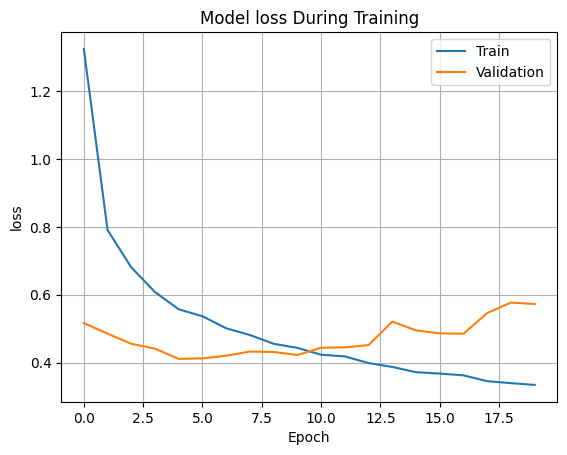

In [ ]:
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('Model loss During Training')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

In [ ]:
plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history['val_loss'])
plt.title('Model loss During Training')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

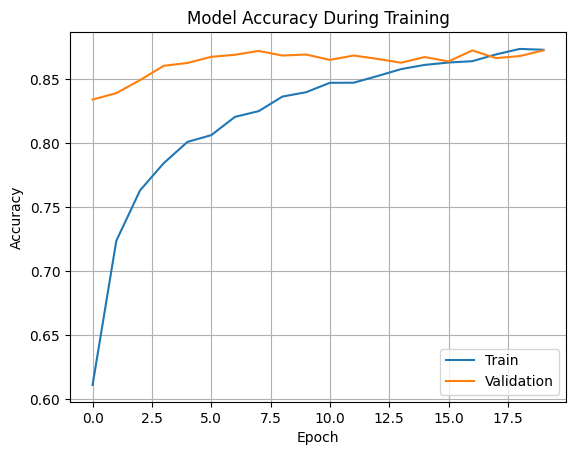

In [ ]:
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.title('Model Accuracy During Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

## Transformer Based Vision (ViT)

In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 130.5 MB/s eta 0:00:00


In [ ]:
from transformers import TFAutoModelForImageClassification
from tensorflow.keras.layers import Input, Lambda, Permute
from tensorflow.keras.models import Model

# Load the pre-trained DeiTBaseDistilled model
deit_model = TFAutoModelForImageClassification.from_pretrained(\
                'facebook/deit-base-distilled-patch16-224')



for layer in deit_model.deit.encoder.layer[:11]:
    layer.trainable = False

for layer in deit_model.deit.encoder.layer[11:]:
    layer.trainable = True


# Create a Keras input layer
inputs = Input(shape=(224, 224, 3))

# Create a lambda layer to convert the input to the format expected by the DeiT model
x = Permute((3,1,2))(inputs)
x = deit_model(x).logits
x = Dense(256)(x)
x = ReLU()(x)
x = Dropout(0.05)(x)
predictions = Dense(10, activation='softmax')(x)
model_DeiT = Model(inputs = inputs, outputs = predictions)

model_DeiT.compile(loss='categorical_crossentropy', optimizer='adam',\
              metrics=['accuracy'])
model_DeiT.summary()

All model checkpoint layers were used when initializing TFDeiTForImageClassificationWithTeacher.

All the layers of TFDeiTForImageClassificationWithTeacher were initialized from the model checkpoint at facebook/deit-base-distilled-patch16-224.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDeiTForImageClassificationWithTeacher for predictions without further training.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 permute_1 (Permute)         (None, 3, 224, 224)       0         
                                                                 
 tf_dei_t_for_image_classifi  TFDeiTForImageClassifica  87338192 
 cation_with_teacher_1 (TFDe  tionWithTeacherOutput(lo           
 iTForImageClassificationWit  gits=(None, 1000),                 
 hTeacher)                    cls_logits=(None, 1000)            
                             , distillation_logits=(N            
                             one, 1000),                         
                              hidden_states=None, att            
                             entions=None)                       
                                                           

In [ ]:
history = model_DeiT.fit(gen_train,steps_per_epoch=len(x_train) // 64,\
                    validation_data = gen_val ,epochs=10) #

Epoch 1/10
773/773 [==============================] - 1497s 2s/step - loss: 0.2633 - accuracy: 0.9140 - val_loss: 0.2230 - val_accuracy: 0.9280
Epoch 2/10
773/773 [==============================] - 1470s 2s/step - loss: 0.1602 - accuracy: 0.9466 - val_loss: 0.2662 - val_accuracy: 0.9140
Epoch 3/10
773/773 [==============================] - 1475s 2s/step - loss: 0.1353 - accuracy: 0.9550 - val_loss: 0.1296 - val_accuracy: 0.9540
Epoch 4/10
773/773 [==============================] - 1470s 2s/step - loss: 0.1162 - accuracy: 0.9631 - val_loss: 0.1441 - val_accuracy: 0.9580
Epoch 5/10
773/773 [==============================] - 1473s 2s/step - loss: 0.1094 - accuracy: 0.9632 - val_loss: 0.1434 - val_accuracy: 0.9560
Epoch 6/10
773/773 [==============================] - 1469s 2s/step - loss: 0.0977 - accuracy: 0.9681 - val_loss: 0.1469 - val_accuracy: 0.9500
Epoch 7/10
773/773 [==============================] - 1469s 2s/step - loss: 0.0863 - accuracy: 0.9715 - val_loss: 0.1182 - val_accuracy:

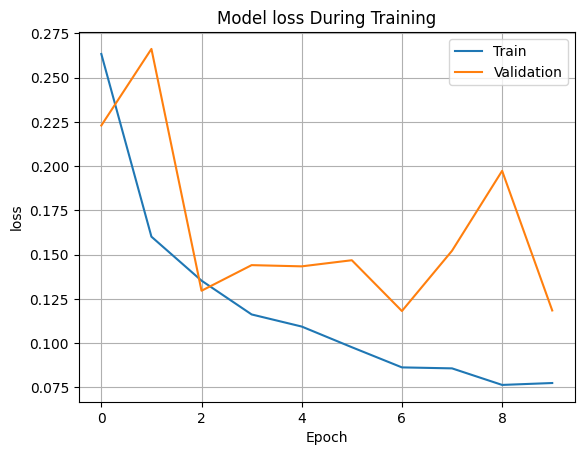

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss During Training')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

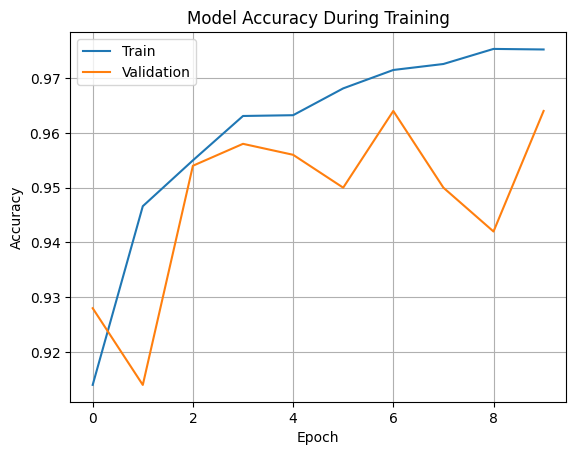

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy During Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()